<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Supplemental-Materials" data-toc-modified-id="Supplemental-Materials-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Supplemental Materials</a></span></li><li><span><a href="#Finite-State-Machine-Design" data-toc-modified-id="Finite-State-Machine-Design-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Finite State Machine Design</a></span></li><li><span><a href="#Model-Development-&amp;-Validation" data-toc-modified-id="Model-Development-&amp;-Validation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Model Development &amp; Validation</a></span></li><li><span><a href="#Controller-Design" data-toc-modified-id="Controller-Design-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Controller Design</a></span></li><li><span><a href="#Controller-Validation" data-toc-modified-id="Controller-Validation-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Controller Validation</a></span></li></ul></div>

## Supplemental Materials

* Submit ALL of files on moodle (matlab, data files, arduino code)
* Submit your performance video on moodle (with your name IN the filename!)

## Finite State Machine Design
* State transition diagram and table

Following the challenge requirements and guidelines, the following nested finite state machine was created. The overall finite state machine is composed of four states: waiting, timing, line following, and obstacle avoidance. Within the obstacle avoidance state, there is a second, smaller nested finite state machine consisting of two states: turning and forward. Starting with the outer finite state machine, the Zumo will always start in the waiting state, where it is not moving and awaiting input from the user to begin the track run. Upon a unique press of button C on the Zumo, it will enter the timing state, where the Zumo will wait for 1 second before starting to give the user ample time to release the button and remove their hand. Once this 1 second interval has surpassed, the Zumo will enter the line following state, where it will follow the black track line under closed loop control. While the Zumo is line following, it will check the proximity sensors every 0.2 seconds. If the proximity sensor returns a value above the provided threshold (in this case 4), the Zumo will enter the obstacle avoidance state. Upon entering the obstacle avoidance state, the Zumo will begin in the nested turning state, where it will turn a given angle under closed loop control. The Zumo is given 0.5 seconds to make each turn and once this time has surpassed, the Zumo will enter the forward driving state. Upon transitioning from the turning state to the forward driving state, a counter will increment up 1, to signify that the Zumo has completed +1 of the designated turns. In the forward state, the Zumo will drive a given distance forward under closed loop control. Once the Zumo is within a given distance error, the Zumo will transition back to the turning state to complete another turn. Upon the transitioning from the forward state back to the turning state, another counter will be incremented up 1, signifying the completion of +1 of the designated forward driving segments. If the preset value of the first counter has been achieved (after the completion of 4 turns as the Zumo drives in a box shape around the obstacle), the Zumo will exit the obstacle avoidance state and return to the line following state. The Zumo will remain in this line following state and thus will require the user to manually stop the Zumo after crossing the finish line. 

The state transition diagrams and accompanying tables for both finite state machines can be seen below:

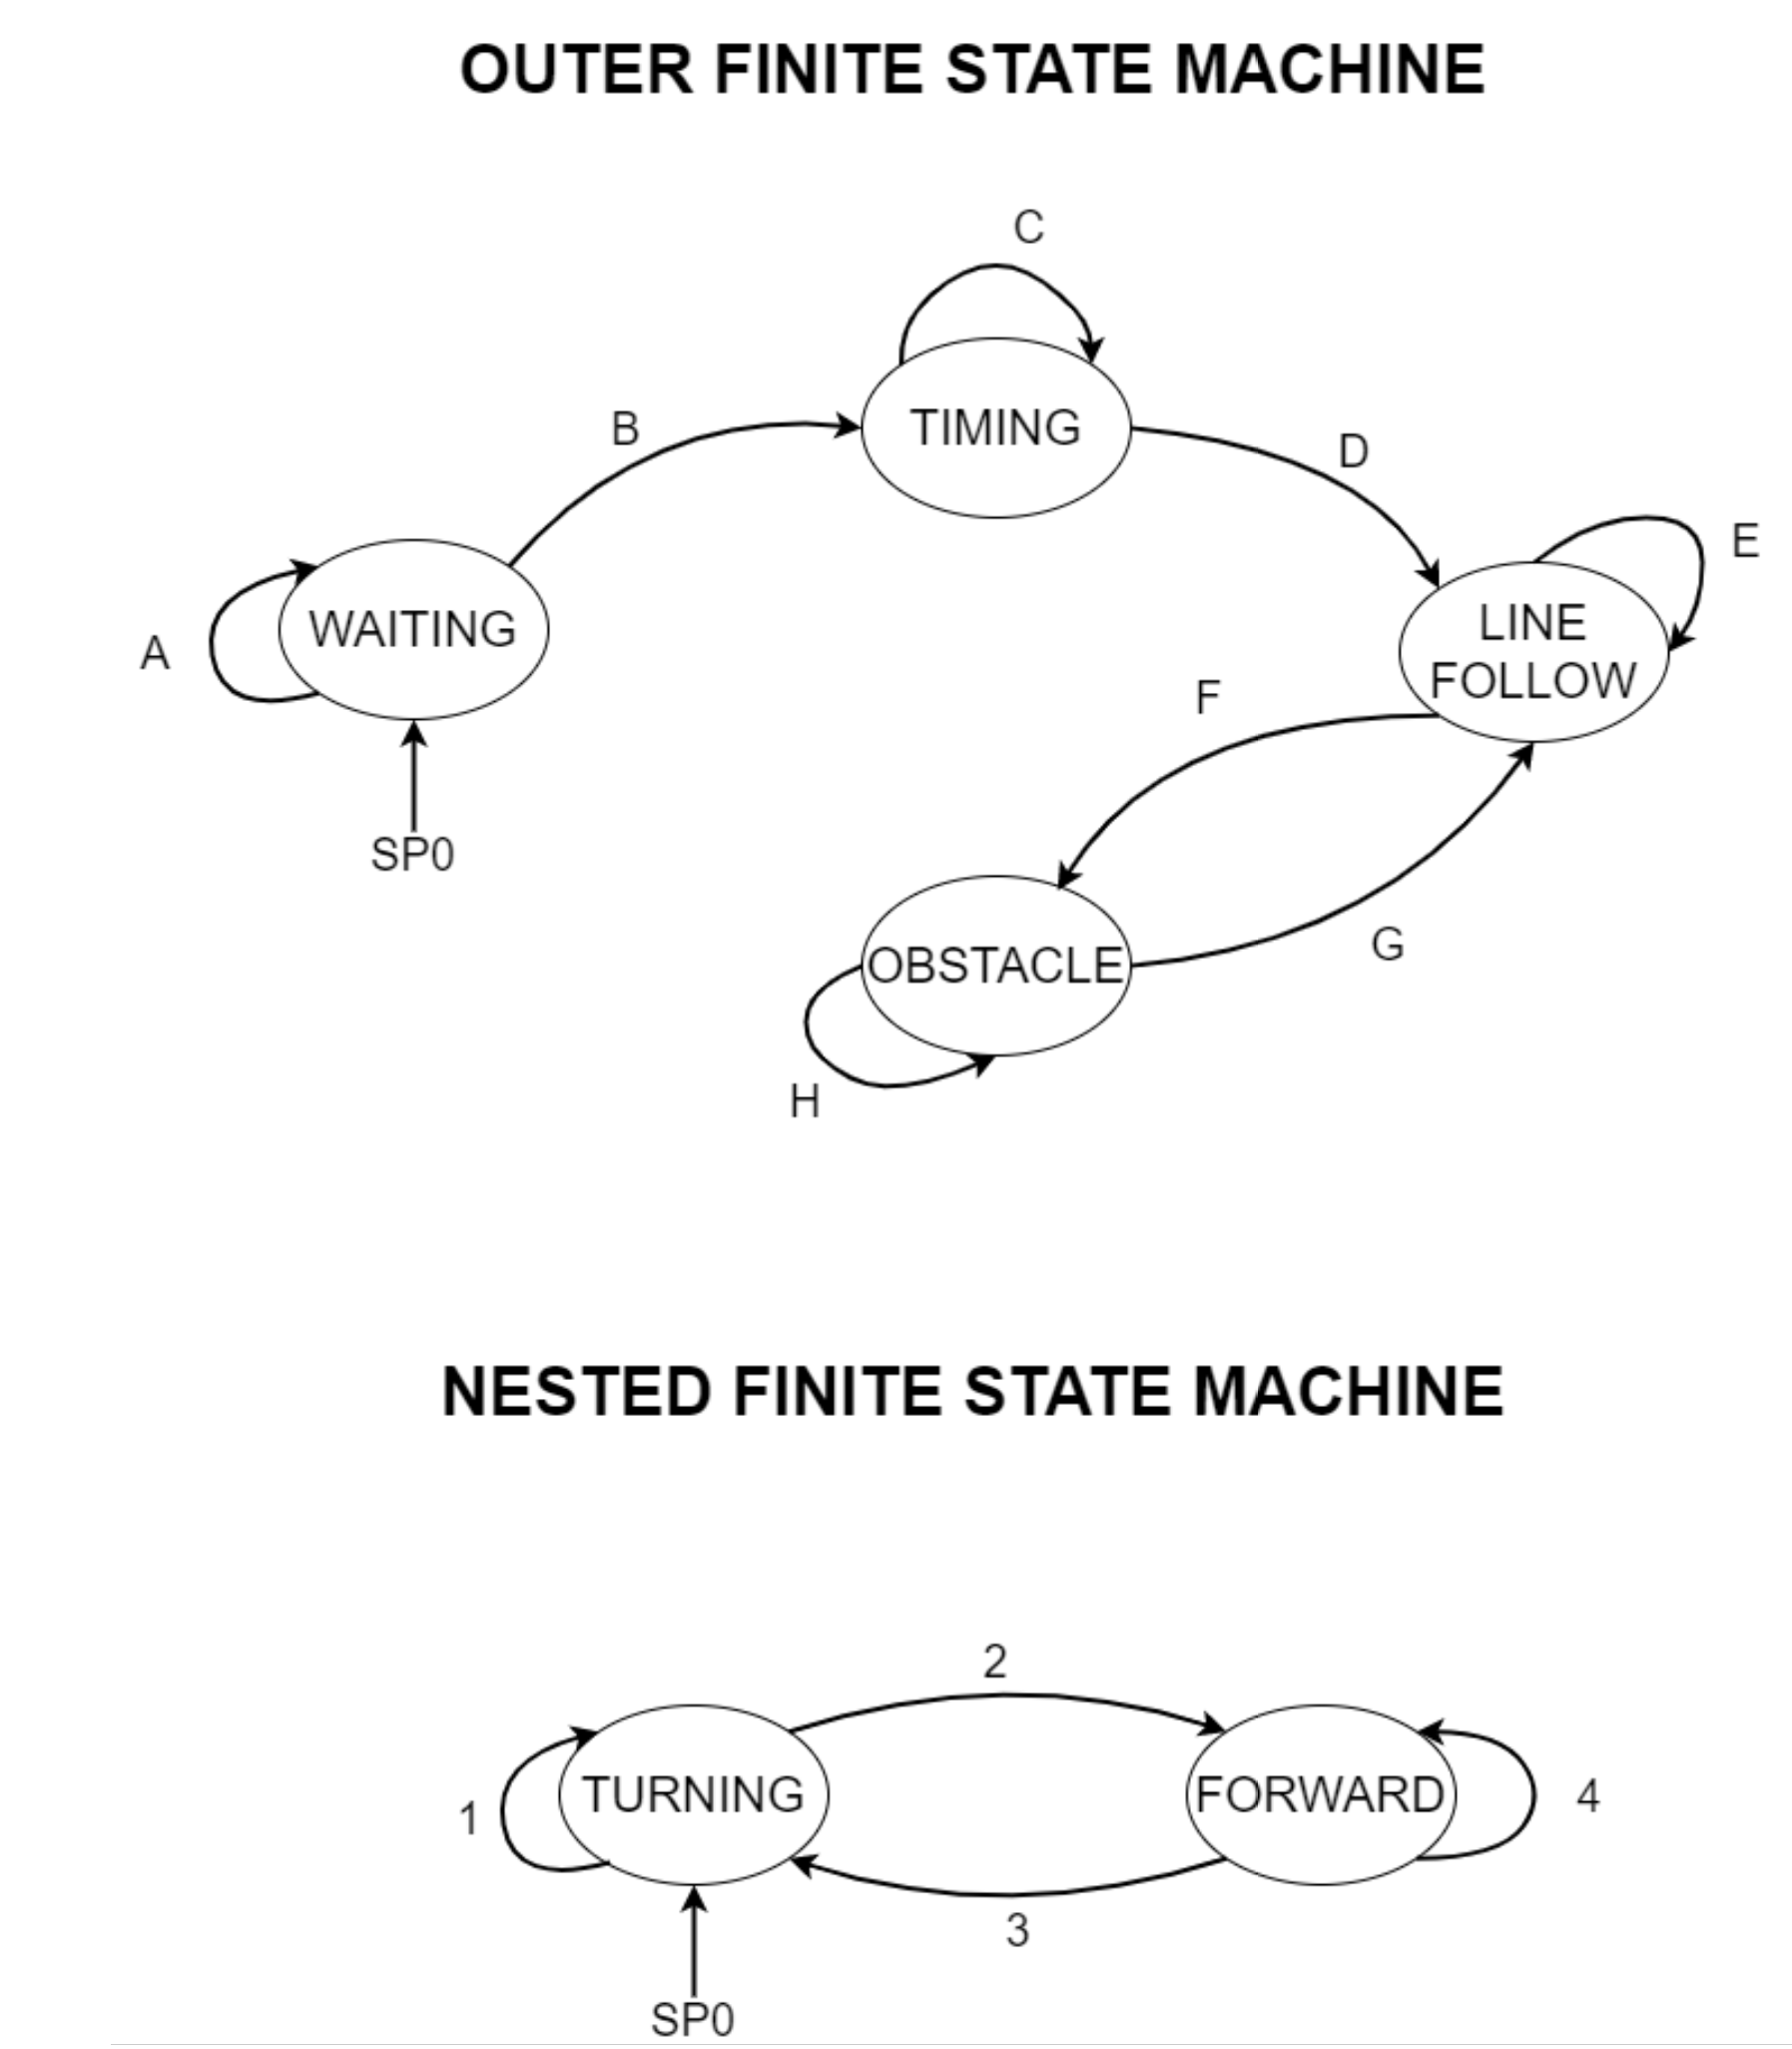

|Transition|Starting State|Transition Condition|Ending State|
|:---:|:---:|:---:|:---:|
|A|WAITING|$\overline{buttonPress}$|WAITING|
|B|WAITING|$buttonPress$|TIMING|
|C|TIMING|$\overline{TMR1}$|TIMING|
|D|TIMING|$TMR1$|LINE FOLLOW|
|E|LINE FOLLOW|$proxCounts < 4$|LINE FOLLOW|
|F|LINE FOLLOW|$proxCounts \geq 4$ $\cdot \overline{CNT2}$|OBSTACLE|
|G|OBSTACLE|$CNT2$|LINE FOLLOW|
|H|OBSTACLE|$\overline{CNT2}$|OBSTACLE|
|1|TURNING|$\overline{TMR2}$|TURNING|
|2|TURNING|$TMR2\cdot \overline{CNT2}$|FORWARD|
|3|FORWARD|errorPositionLeft $\leq$ 0.01 $\cdot$ errorPositionRight $\leq$ 0.01|TURNING|
|4|FORWARD|errorPositionLeft > 0.01 + errorPositionRight > 0.01|FORWARD|

## Model Development & Validation
* Assumptions and Justification for all modeling choices.
* Plant validation plots

There were two developed models utilized for this project: 1. a model of the Zumo's motors relating motor angular speed to input voltage and 2. a model relating the Zumo's yaw rate to input voltage. The first model was developed in Project 1 and a detailed derivation can be referenced in the accompanying report. Overall, this model was derived using a physics-based method. The transfer function for this model relating the Zumo's motor angular speed to input voltage is:

$\frac{\Omega(s)}{V_s(s)} = \frac{K_t}{RJs + (K_t^2 + Rb)} = \frac{0.06622}{0.000409s + 0.007688} [\frac{\frac{rad}{s}}{V}]$

This plant transfer function was validated by collecting angular speed readings from the Zumo's motors when given a known input voltage and comparing this to the model's predicted simulation. The following plot shows the results of this validation test with a step input of 3.0V:

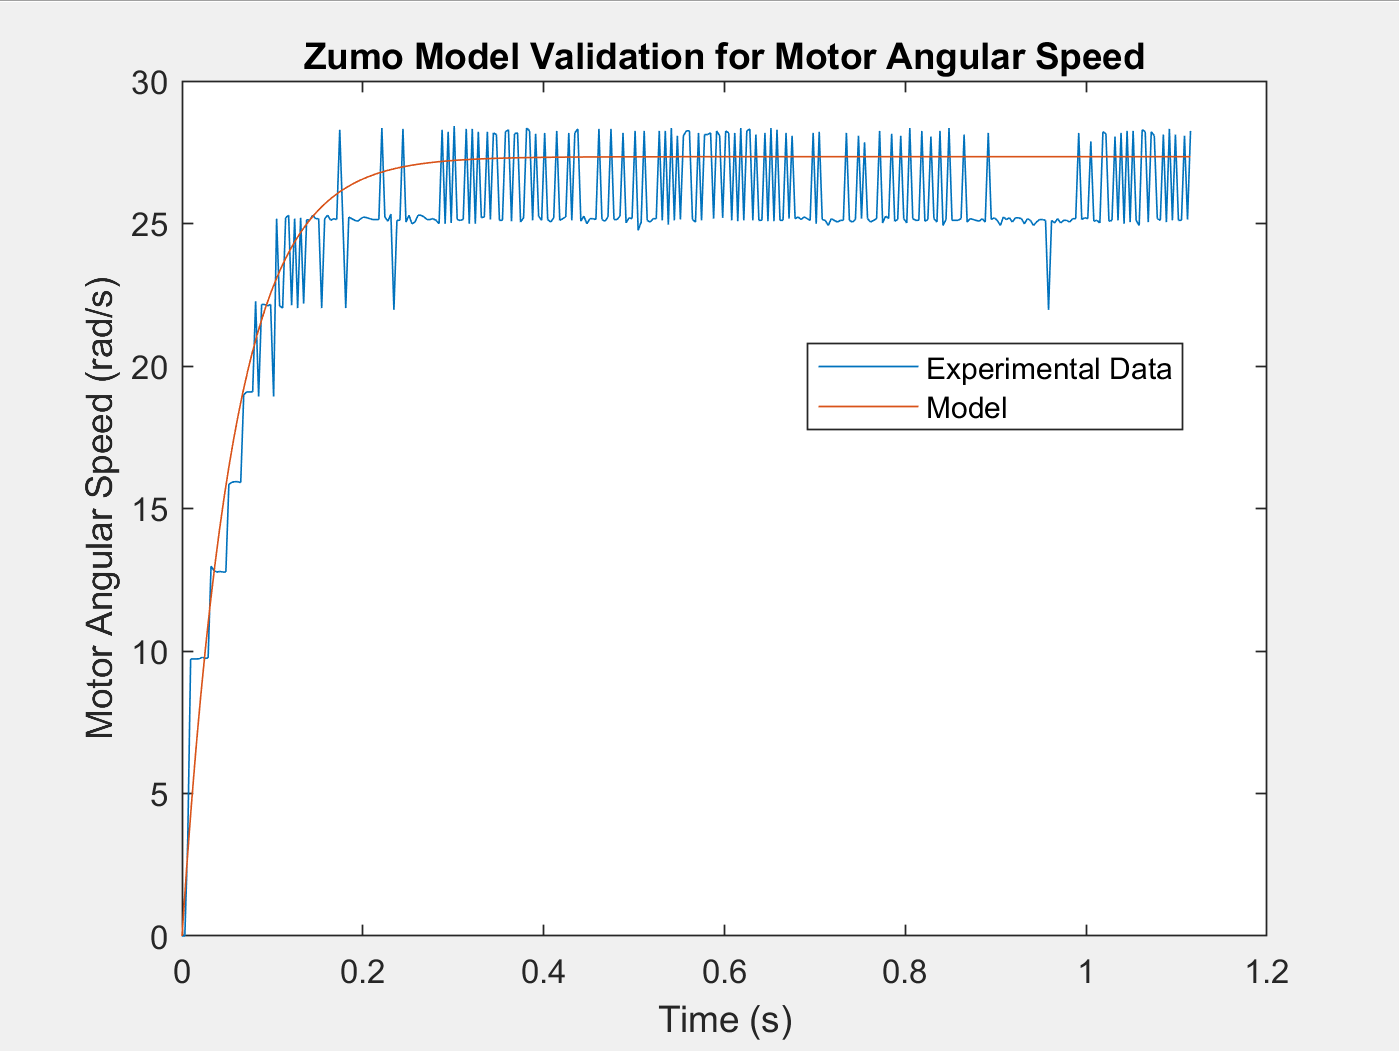

As can be clearly seen, the developed model is an accurrate predictor of the Zumo's transient and steady state angular speed.

For this project, the Zumo's position was to be controlled during the obstacle avoidance portion of the task. A relation between the Zumo's angular position and input voltage can be determined by integrating the transfer function relating the Zumo's angular speed to input voltage:

$\frac{\theta(s)}{V_s(s)} = \frac{\Omega(s)}{V_s(s)} \frac{1}{s} = \frac{0.06622}{0.000409s^2 + 0.007688s} [\frac{rad}{V}]$

The linear position of the Zumo can then be determined through simple conversion knowing that one revolution (or $2\pi$ radians) is equivalent to traveling forward the circumference of the Zumo's wheel. 

The second model utilized for this project is a model relating the Zumo's yaw rate to input voltage. This model was developed numerically in Project 2 (the report for which can be referred to for a detailed model derivation). The first-order transfer function for the model relating yaw rate to input voltage is: 

$\frac{\dot{\psi}(s)}{V(s)} = \frac{53.48}{s+23.19} [\frac{\frac{rad}{s}}{V}]$

This plant transfer function was validated by collecting the Zumo's yaw rate over time when given a known input voltage and comparing this to the model's predicted simulation. The following plot shows the results of this validation test with a step input of 2.4V:

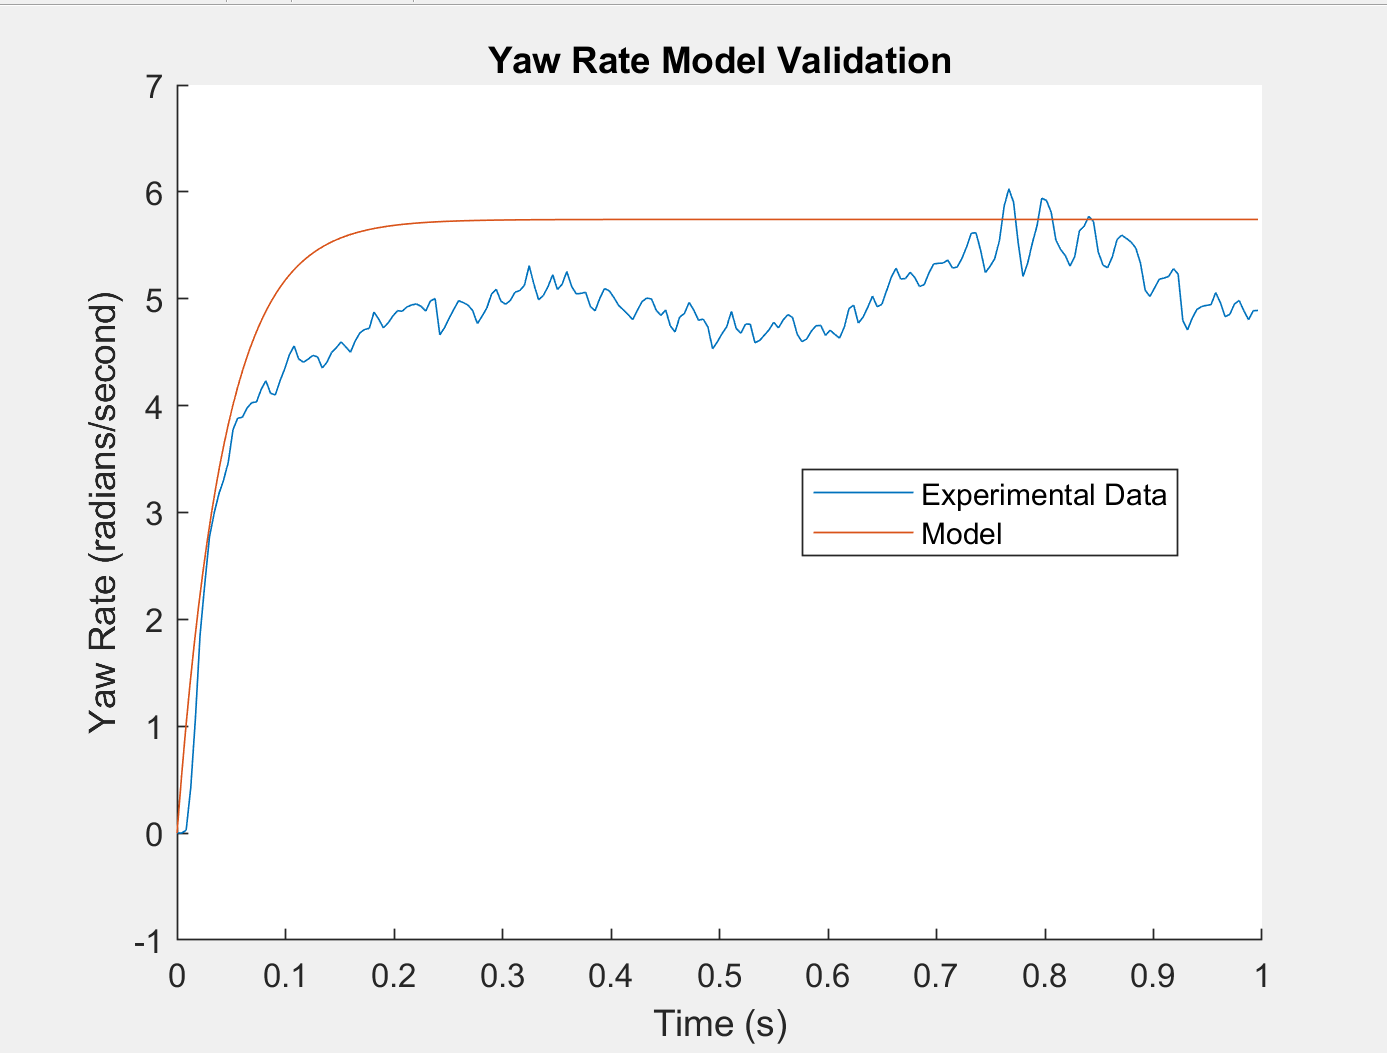

As can be seen from the above figure, the model accurately predicts the transient behavior, but slightly overpredicts the observed steady state behavior. This can be attributed to changes in surface friction. This model relating yaw rate to input voltage was developed for Project 2, using a different surface than what was utilized and tested on for Project 3. This discrepancy is small enough as to not drastically affect results nor the Zumo's performance.

The model relating yaw rate to input voltage was to be utilized for the line following controller. Additionally, the Zumo's yaw angular position was to be controlled during the obstacle avoidance portion of the task. A relation between the Zumo's yaw angular position and input voltage can be determined by integrating the transfer function relating the Zumo's yaw rate to input voltage:

$\frac{\psi(s)}{V_s(s)} = \frac{53.48}{s+23.19} \frac{1}{s} = \frac{53.48}{s^2+23.19s}  [\frac{rad}{V}]$

## Controller Design
* List of controllers that are active by state.
* Assumptions and justifications for each controller type
* Process to determine desired behavior (design goal) for each controller
* Process, including all steps (hand calcs or Octave code), for each controller design (root locus, angle deficiency, etc.)
* Final controller gains for each controller

For this project, three controllers were designed and implemented: 1. a line following controller, 2. a position controller, and 3. a yaw angle controller. All three controllers worked independently of one another. The position and yaw angle controllers were active during the OBSTACLE avoidance state and the line following controller was active during the LINE FOLLOWING state. 

The first controller developed specifically for this project's task was the line following controller. This controller was developed referencing the vehicle control example presented in lecture. The block diagram for this vehicle control example can be seen below:

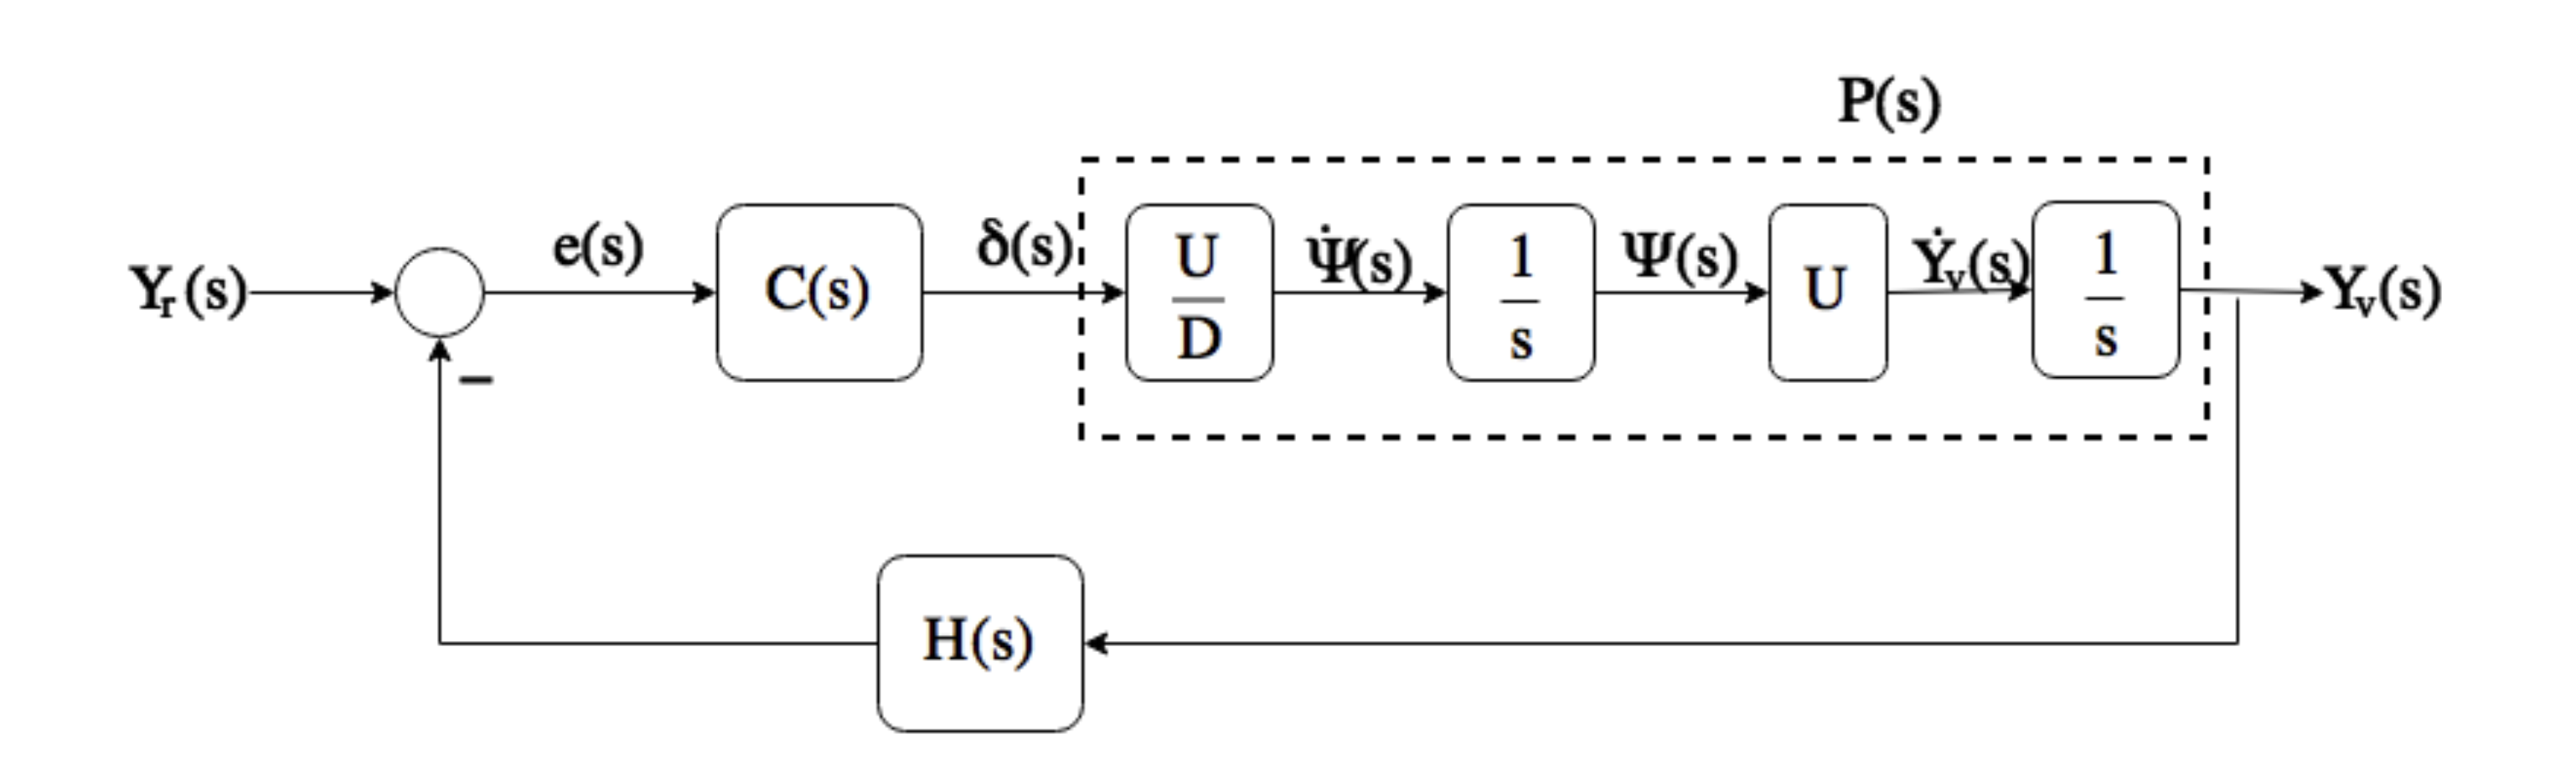

However, this block diagram was developed for a system in which angular position of the steering wheel was the input into the plant transfer function. Thus, this block diagram was modified so that voltage was the input into the plant transfer function, as well as incorporating the plant transfer function relating input voltage to the Zumo's yaw angle. The modified block diagram for the line following controller developed for this project can be seen below:

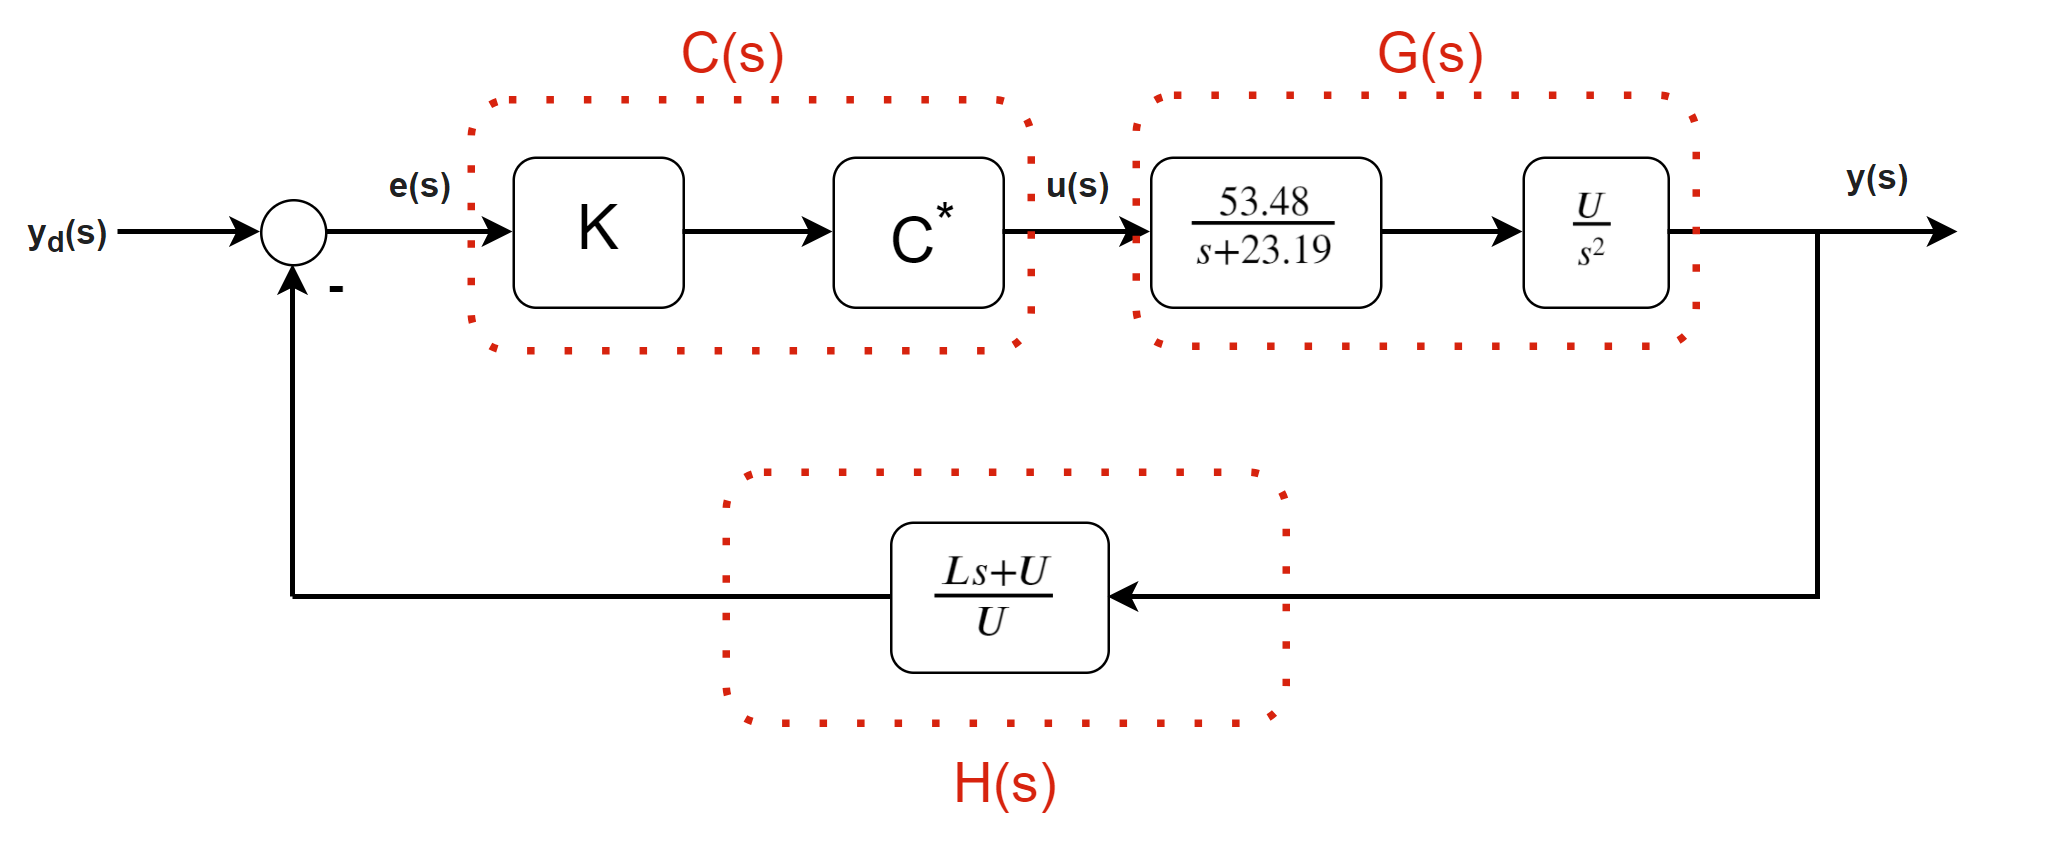

In this block diagram, $L$ represents the preview distance in meters and $U$ represents the Zumo's speed. The preview distance was measured to be 0.05 meters and the Zumo's velocity was chosen to be 0.4 m/s. This velocity was chosen as it was the fastest the Zumo could operate under this controller while still maintaining accuracy and stability. 

Since the plant transfer function (represented by $G(s)$ in the block diagram) has at least one pole at the origin, the controller can theoretically achieve zero steady state error under PD control. Thus, to control line following, a PD controller was developed. This controller would only add a zero to the plant transfer function. The line following transfer function under PD control takes the form:

$GH_{line} = \frac{53.48(Ls+U)(s+z_1)}{s^2(s+23.19)} = \frac{2.674(s+8)(s+z_1)}{s^2(s+23.19)} [\frac{m}{V}]$

where $z_1$ represents the PD controller zero. 

In order to determine the zero, a desired eigenvalue must be determined. In this case, a damping ratio of $\zeta = 0.9$ and settling time of $t_s = 0.25 s$ was chosen. These values were selected as it was imperative that the line following controller not have too much overshoot, as well as settle quickly. Since $t_s = \frac{4}{\zeta \omega_n}$, the desired natural frequency ($\omega_n$) was determined to be 17.78 rad/s. The desired eigenvalue can then be determined through the following relation: $sd = -\zeta \omega_n \pm \omega_n \sqrt{1-\zeta}$. Once the desired eigenvalue was determined, the zero was found utilizing angle deficiency method:

$\Sigma (< poles) - \Sigma (< zeros) = \pm 180$

The Octave cell below shows the calculation for determining the angle of the line following controller's zero:

In [7]:
s = tf('s');
U = 0.4; % velocity of Zumo (m/s)
L = 0.05; % preview distance (distance from centerpoint of Zumo to line readers)
Pyaw = 53.48/(s+23.19); % plant transfer function for yaw rate
P = Pyaw*(U/s^2); % plant tf
H = (L*s+U)/U;

% PD control...
zetad = 0.9; % want very little overshoot
tsd = 0.25; 
wnd = 4/(tsd*zetad); % desired natural frequency
sd = -(zetad*wnd) + wnd*sqrt(1-zetad^2)*1j;
sd2 = -(zetad*wnd) - wnd*sqrt(1-zetad^2)*1j;

[num,den] = tfdata(P*H,'v');
poles = roots(den);
zeros = roots(num);

ang_p1 = atan2d(imag(sd)-imag(poles(1)),real(sd)-real(poles(1)));
ang_p2 = atan2d(imag(sd)-imag(poles(2)),real(sd)-real(poles(2)));
ang_p3 = atan2d(imag(sd)-imag(poles(3)),real(sd)-real(poles(3)));
ang_z1 = atan2d(imag(sd)-imag(zeros(1)),real(sd)-real(zeros(1)));
ang_z_line = -180+ang_p1+ang_p2+ang_p3-ang_z1 % angle from zero to target eigenvalue

ang_z_line =  39.547


Using basic trigonemtric relationships, a value for the zero can be determined:

In [8]:
d = (imag(sd))/(tand(ang_z_line));
z_line = abs(real(sd)-d) % zero

z_line =  25.385


Therefore, the transfer function for the line following PD controller becomes:

$GH_{line} = \frac{2.674s^2+89.28s+543.1}{s^3+23.19s^2} [\frac{m}{V}]$

The root locus for the line following PD controller is shown below with desired eigenvalues emphasized with large red circles:

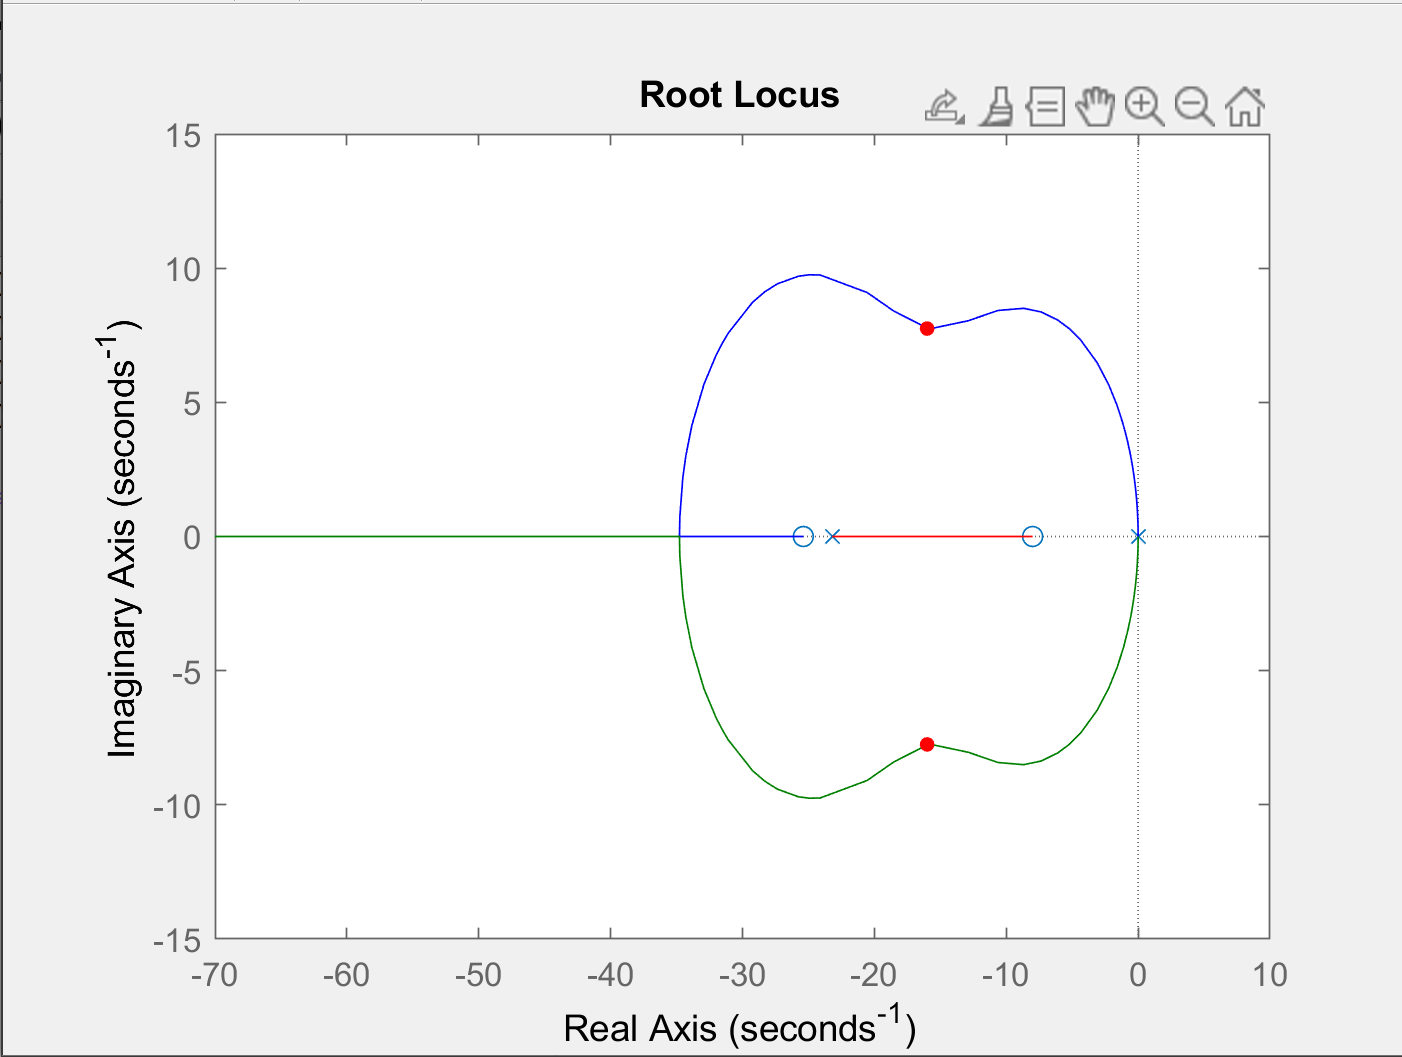

Once a value for the zero is determined, the overall controller gain can be determined using the magnitude criterion where: $|\frac{-1}{K}| = |G(s)H(s)|$. Once the overall controller gain is determined, values for the proportional and derivative controller gains can be determied through the following relationships:

$K = K_{sum}K_d$

$z = \frac{K_p}{K_d}$

Calculations for the overall controller gain, as well as the proportional and derviative gains for the line following controller is shown below:

In [9]:
mag_GH_at_sd = abs((2.674*sd^2+89.28*sd+543.1)/(sd^3+23.19*sd^2));
K_line = 1/(mag_GH_at_sd)
Ksum = 1.0;
Kd_line = K_line/Ksum
Kp_line = Kd_line*z_line

K_line =  9.2151
Kd_line =  9.2151
Kp_line =  233.92


One concern with this line following controller was the minimum time delay required to cause the controller to become unstable. This can be evaluated by first determining the phase margin for this controller design. A plot of the phase and gain margin can be seen below:

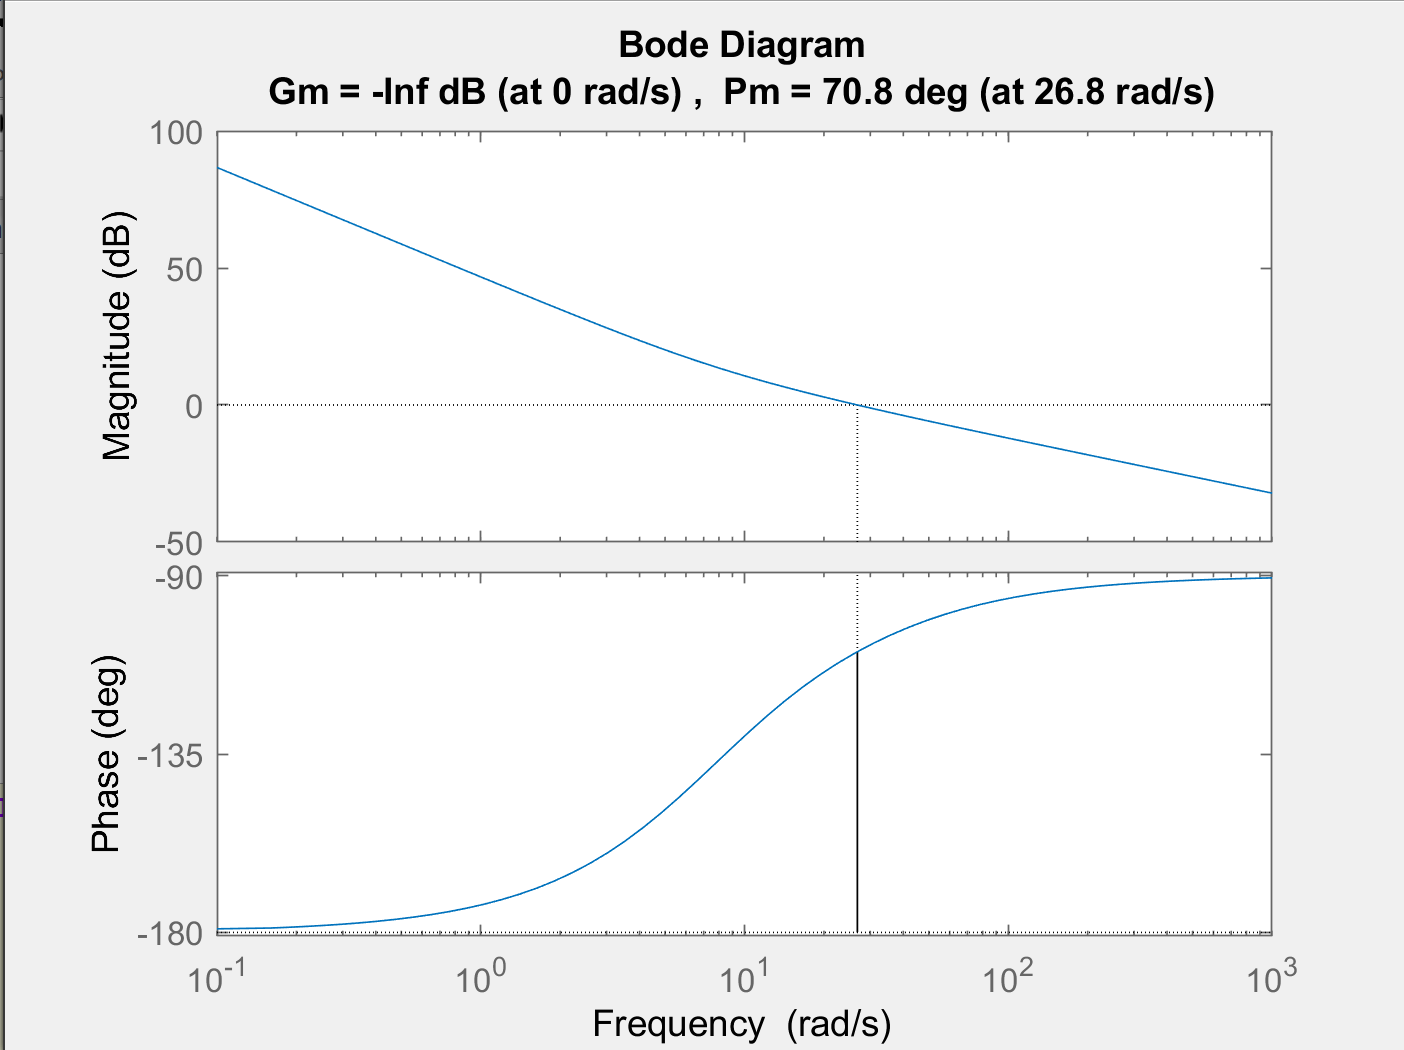

The phase margin for this controller design is $70.8^{\circ}$, which is well within the "safe" limits, at a critical frequency of 26.8 rad/s. The minimum time delay required to cause the controller to become unstable was calculated using the following expression: 

$Ts = \frac{PM}{\omega_0} = \frac{70.8^{\circ}\cdot \frac{\pi}{180^{\circ}}}{26.8 \frac{rad}{s}} = 0.046 s$

The minimum time delay required to cause the controller to become unstable was calculated to be 0.046 seconds. Since the finite state machine developed for this project was quite substantial and included nested finite state machines, this small time delay was a place of concern. Thus, in order to verify that the controller was not at risk of becoming unstable due to the time delay introduced with the implementation of a large finite state machine, the time between loop iterations was measured for both the program implementing only the line following and the entire finite state machine. The time between loop iterations measured for the smaller program containing only line following was approximatly 0.004 seconds. In comparison, the time between loop iterations measured for the entire finite state machine was approximately 0.006 seconds. This is well within our limit, and thus the line following controller would not be at risk of becoming unstable due to a time delay. This small change in time between loop iterations between the smaller program containing only line following and the larger, complete finite state machine can be attributed to the decision to only read the proximity sensor every 0.2 seconds as that slows down the loop iteration time substantially. 

The other two controllers utilized for this project were taken or adapted from the position and yaw angle controllers developed for Project 2. 

The position controller used in this project differs from the one developed in Project 2 as the nested velocity controller was removed as it was deemed unnecessary to control velocity during the obstacle avoidance portion of the track. The plant transfer function relating angular position and input voltage is:

$\frac{\theta(s)}{V(s)} = \frac{0.06622}{0.000409s^2 + 0.007688s} [\frac{rad}{V}]$

Since this plant transfer function has one pole at the origin, PD control was selected as it would be able to theoretically produce zero steady state error. This PD controller would only add a zero to the plant transfer function and takes the form:

$GH_{position} = \frac{0.06622(s+z_2)}{0.000409s^2 + 0.007688s} [\frac{rad}{V}]$

where $z_2$ represents the PD controller zero. The controller zero and gains were determined using the same procedure as outlined above for a desired eigenvalue with damping ratio $\zeta = 0.707$ and settling time $t_s = 0.15s$. Calculations and results for the controller zero and gains can be seen below:

In [13]:
Kt = 0.066224663383711;
R = 3.75;
J_left = 1.090662815697082E-4;
J_right = 1.126295490054277E-4;
b_left_avg = 8.805942159746549E-4;
b_right_avg = 9.475603808707928E-4;

P_pos = (Kt/(R*J_left*s + (Kt^2 + R*b_left_avg)))*(1/s);
tsd = 0.15; % desired 2% settling time 
zetad = 0.707; % desired damping ratio for the first order piece
sd = -(zetad*wnd) + wnd*sqrt(1-zetad^2)*1j;

[num,den] = tfdata(P_pos,'v');
poles = roots(den);

ang_p1 = atan2d(imag(sd)-imag(poles(1)),real(sd)-real(poles(1)));
ang_p2 = atan2d(imag(sd)-imag(poles(2)),real(sd)-real(poles(2)));
ang_z_pos = -180+ang_p1+ang_p2; % angle from zero to target eigenvalue
d = (imag(sd))/(tand(ang_z_pos));
z_pos = abs(real(sd)-d) % zero

mag_GH_at_sd = abs((0.06622*sd+3.301)/(0.000409*sd^2+0.007688*sd));
K_pos = 1/(mag_GH_at_sd)
Ksum = 1.0;
Kd_pos = K_pos/Ksum
Kp_pos = Kd_pos*z_pos

z_pos =  49.844
K_pos =  0.039158
Kd_pos =  0.039158
Kp_pos =  1.9518


However, when this independent position controller was implemented, these gains were not large enough to overcome Coulomb friction when the error between the Zumo's position and desired position was small. From exploratory testing, the required voltage the Zumo needs to be supplied in order to just overcome Coulomb friction was determined to be approximately 0.75 V. Knowing this minimum required voltage and the error in desired position and actual position I would be satisfied with, a rough estimate of the proportional gain for the position controller was able to be determined. These calculations can be seen below:

An error of 1 cm (0.01m) was determined to be satisfactory.

$V = K_p\cdot error \therefore 0.75V = K_p(0.01) \therefore K_{p,min} = 75$

Thus, the desired eigenvalue was adjusted to achieve a proportional gain above the calculated minimum. A desired eigenvalue of $sd = -80 \pm 80j$ was chosen as it produced a proportional gain above the required minimum. Calculations and results for the controller zero and gains using this new desired eigenvalue can be seen below:

In [12]:
sd = -80 + 80*1j;

[num,den] = tfdata(P_pos,'v');
poles = roots(den);

ang_p1 = atan2d(imag(sd)-imag(poles(1)),real(sd)-real(poles(1)));
ang_p2 = atan2d(imag(sd)-imag(poles(2)),real(sd)-real(poles(2)));
ang_z_pos = -180+ang_p1+ang_p2; % angle from zero to target eigenvalue
d = (imag(sd))/(tand(ang_z_pos));
z_pos = abs(real(sd)-d) % zero

mag_GH_at_sd = abs((0.06622*sd+6.003)/(0.000409*sd^2+0.007688*sd));
K_pos = 1/(mag_GH_at_sd)
Ksum = 1.0;
Kd_pos = K_pos/Ksum
Kp_pos = Kd_pos*z_pos

z_pos =  90.650
K_pos =  0.87212
Kd_pos =  0.87212
Kp_pos =  79.057


Therefore, the transfer function for the position PD controller becomes:

$GH_{position} = \frac{0.06622s+6.003}{0.000409s^2+0.007688s} [\frac{rad}{V}]$

The root locus for the position PD controller is shown below with desired eigenvalues emphasized with large red circles:

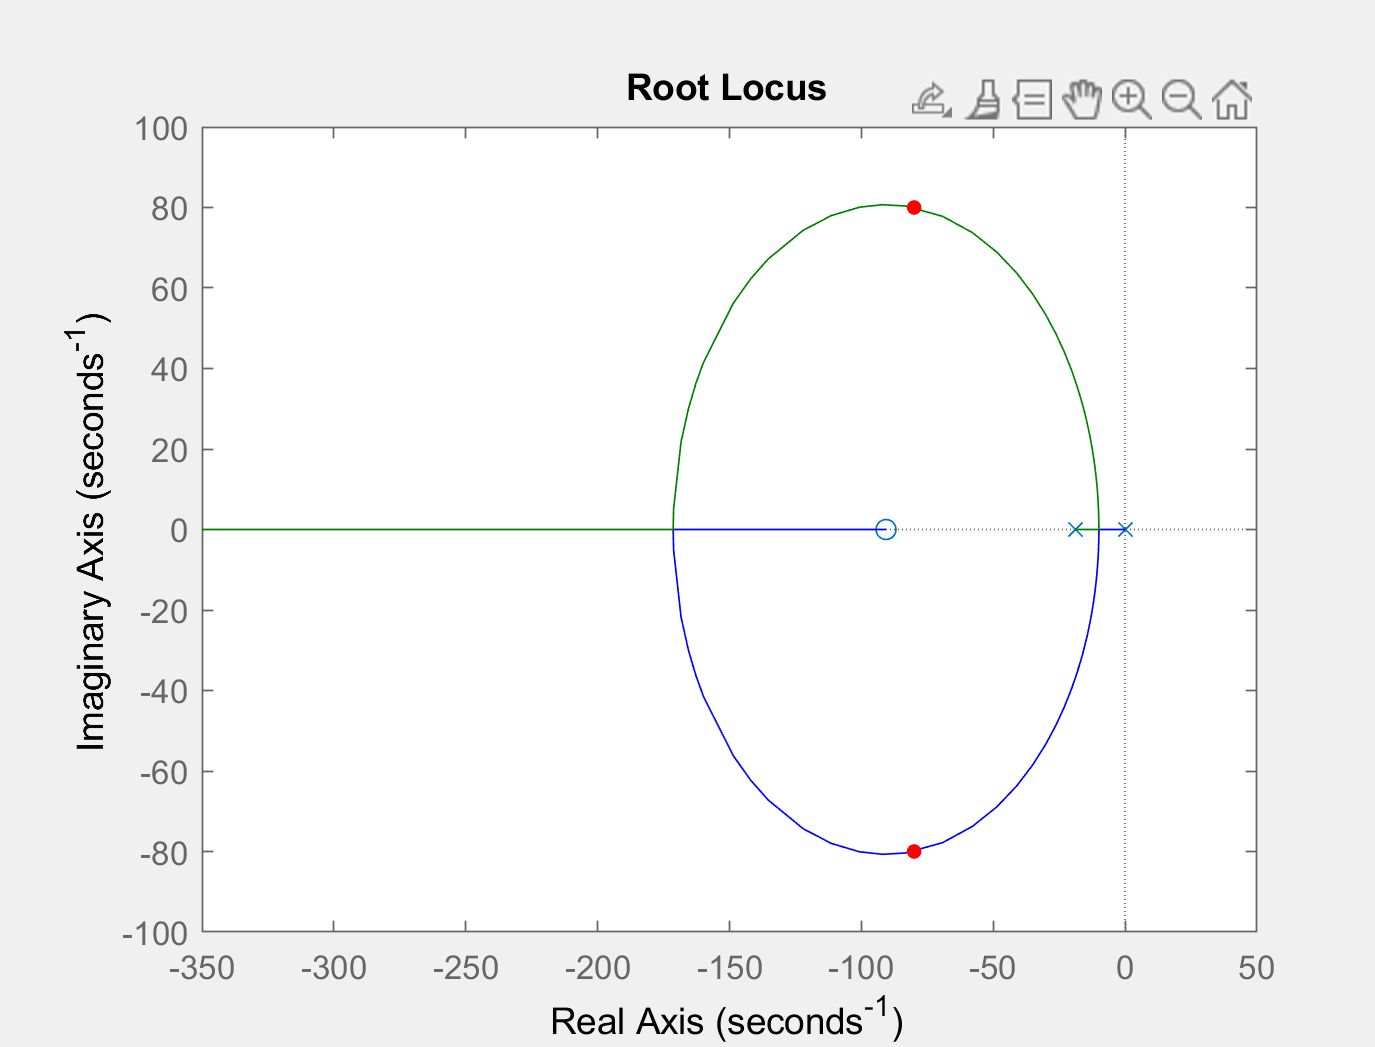

Lastly, the yaw angle controller developed in Project 2 was used for this project. The PD controller zero and gains for the same desired eigenvalues of $sd = -25 \pm 20j$ were determined following the same procedure outlined above: 

In [15]:
sd1 = -25 + 20*1j;
sd2 = -25 - 20*1j;

ang_p1 = atan2d(imag(sd1),real(sd1)); % pole @ origin
ang_p2 = atan2d(imag(sd1),real(sd1)+23.19); % pole @ -a

ang_z_angle = -180+ang_p1+ang_p2; % angle from zero to target eigenvalue
d = (imag(sd1))/(tand(ang_z_angle));
z_angle = -real(sd1) + d % zero

mag_GH_at_sd = abs((3064*sd1+1.172E5)/(sd1^2+23.19*sd1));
K_angle = 1/(mag_GH_at_sd)
Ksum = 1;
Kd_angle = K_angle/Ksum
Kp_angle = Kd_angle*z_angle

z_angle =  38.232
K_angle =  0.0087462
Kd_angle =  0.0087462
Kp_angle =  0.33439


Therefore, the transfer function for the yaw angle PD controller becomes:

$GH_{angle} = \frac{3064s+1.172E5}{s^2+23.19s} [\frac{rad}{V}]$

The root locus for the yaw angle PD controller is shown below with desired eigenvalues emphasized with large red circles:

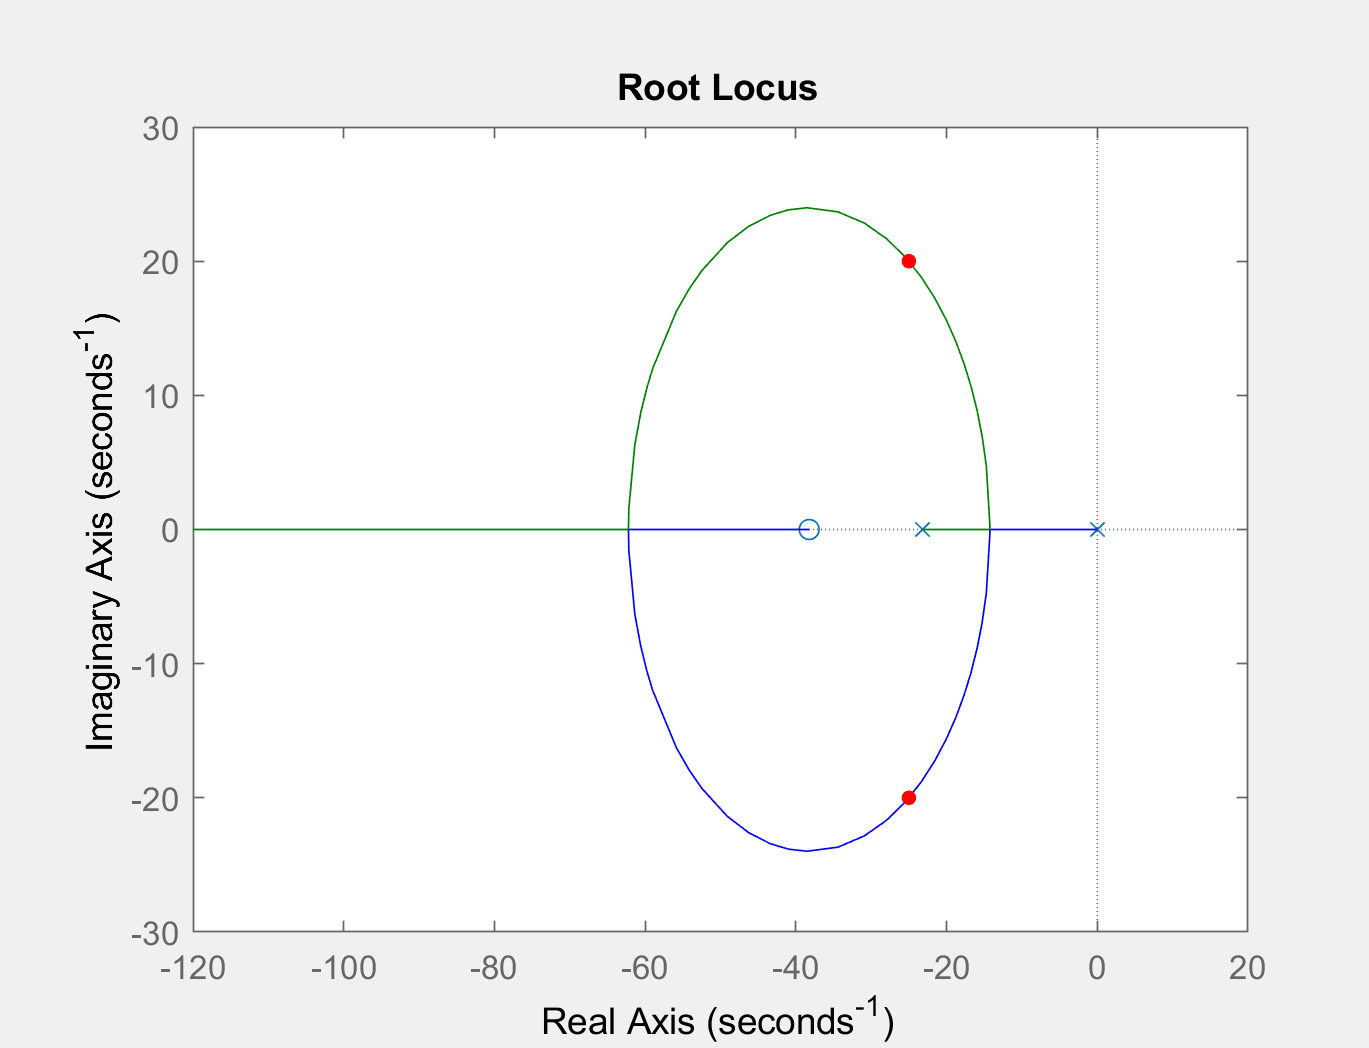

## Controller Validation
 
* Comparison of predicted and measured step responses for each controller. These must be of appropriate magnitude to make a meaningful comparison.
* Physical arguments for any variations between predictions and achieved performance.

Each of the three controllers developed and used in this project were independently validated. The line following controller was validated by collecting line error data when the Zumo encounters the 1-centimeter step in the beginning of the track. The transfer function relating line error to input desired line position was determined through the following block diagram algebra analysis (the same block diagram from above is also included here for clarity):

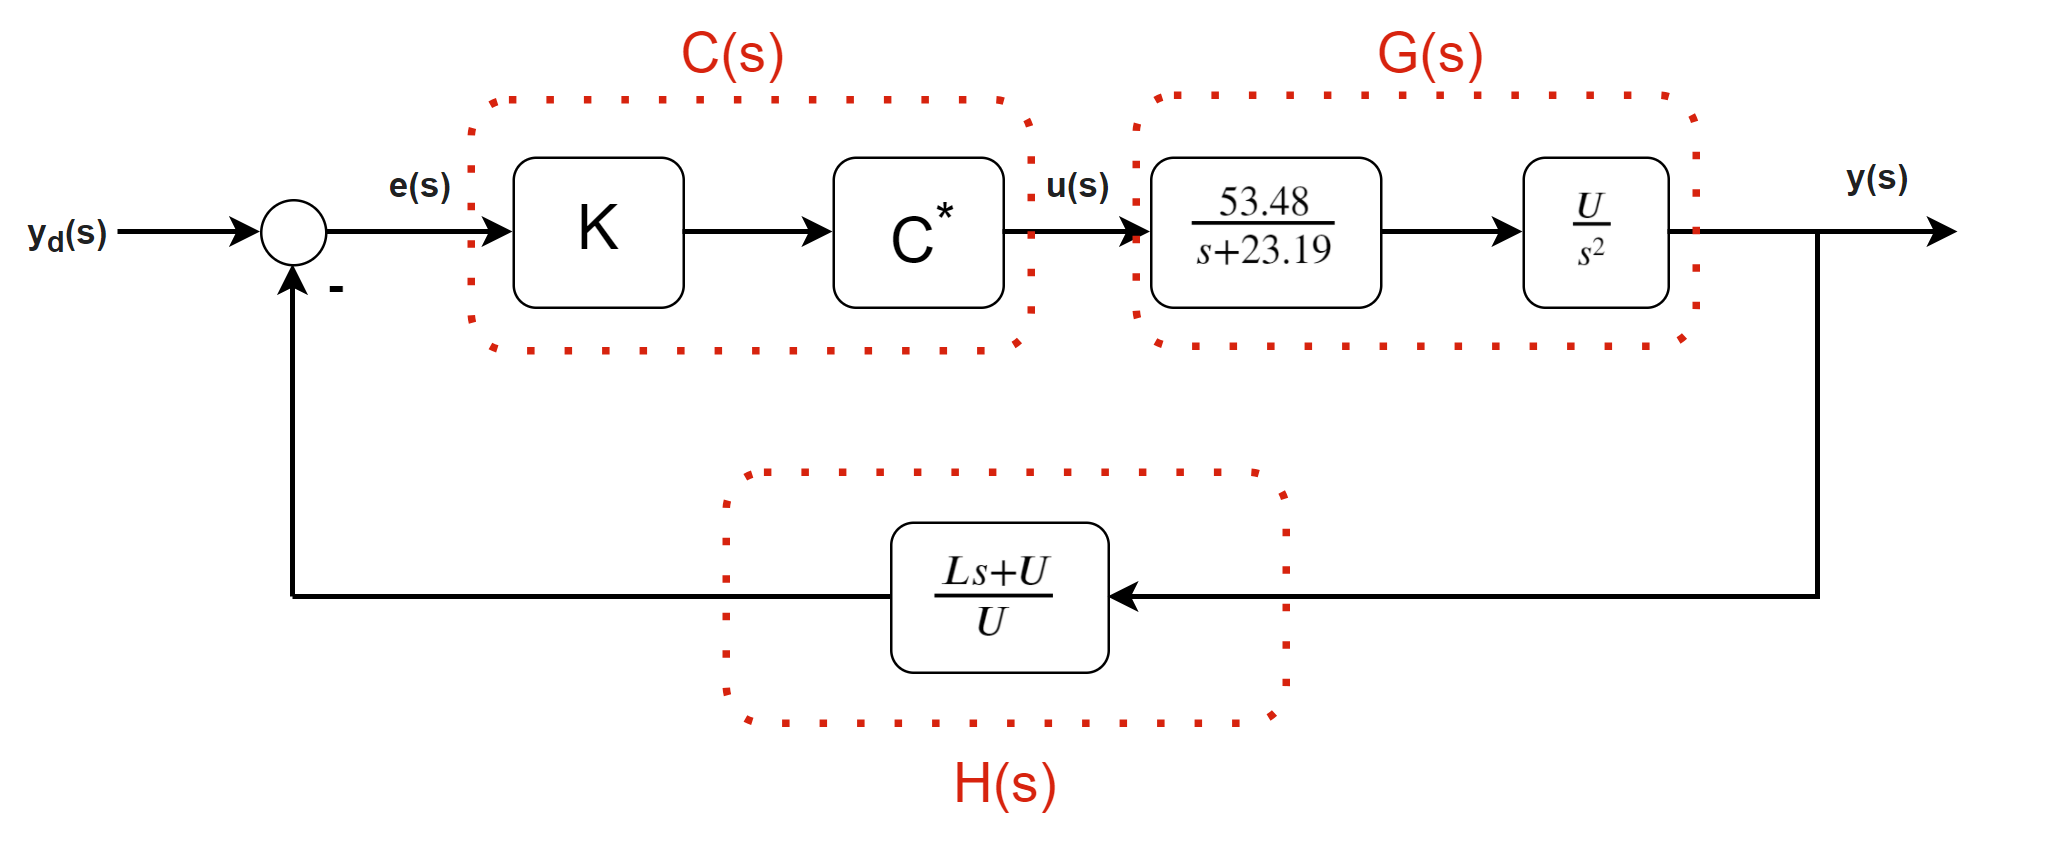

Equation 1: $e(s) = y_d(s) - y(s)H(s)$

Equation 2: $u(s) = e(s)C(s)$

Equation 3: $y(s) = u(s)G(s)$

Substituting equation 3 into equation 1:
$e = y_d - yH \therefore e = y_d - uGH$

Subtituting equation 2 into equation 1:
$e = y_d - uGH \therefore e = y_d - eCGH$

Collecting like terms:
$y_d = e + eCGH = e(1+CGH)$

Thus, the transfer function relating input desired line position to line error is:

$\frac{e(s)}{y_d(s)} = \frac{1}{1+C(s)G(s)H(s)} = \frac{s^3 + 23.19s^2}{s^3+47.83s^2+822.7s+5004} [\frac{m}{m}]$

The following plot shows the collected line error data compared to the model prediction with an input step of 0.01 meters:

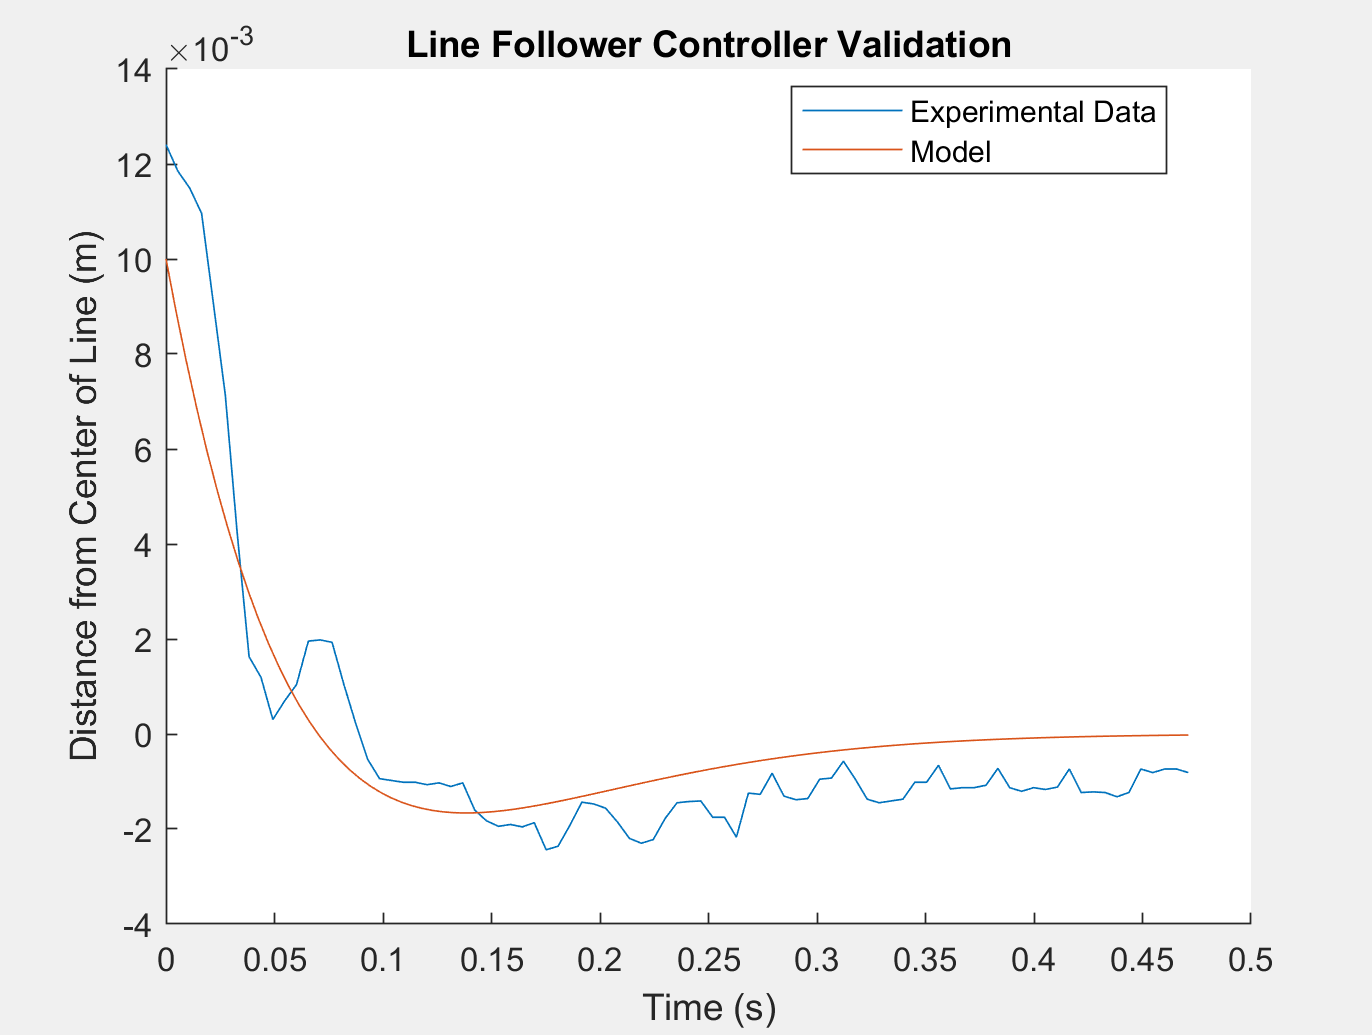

As can be seen from the above plot, the model accurately predicts both transient and steady state line following behavior. The damping ratio of 0.9 can be seen in both the model and collected data by the small amount of overshoot before settling. In addition, the 2% settling time of 0.25s can be seen in both the data and the model. 

The position controller was independently validated by requesting a certain position and collecting the Zumo's position as it drives to achieve this desired position. The desired position was set to 0.0632 m, as this was the maximum desired position that can be requested without encountering saturation. The following figure shows the collected position data plotted against the model's prediction:

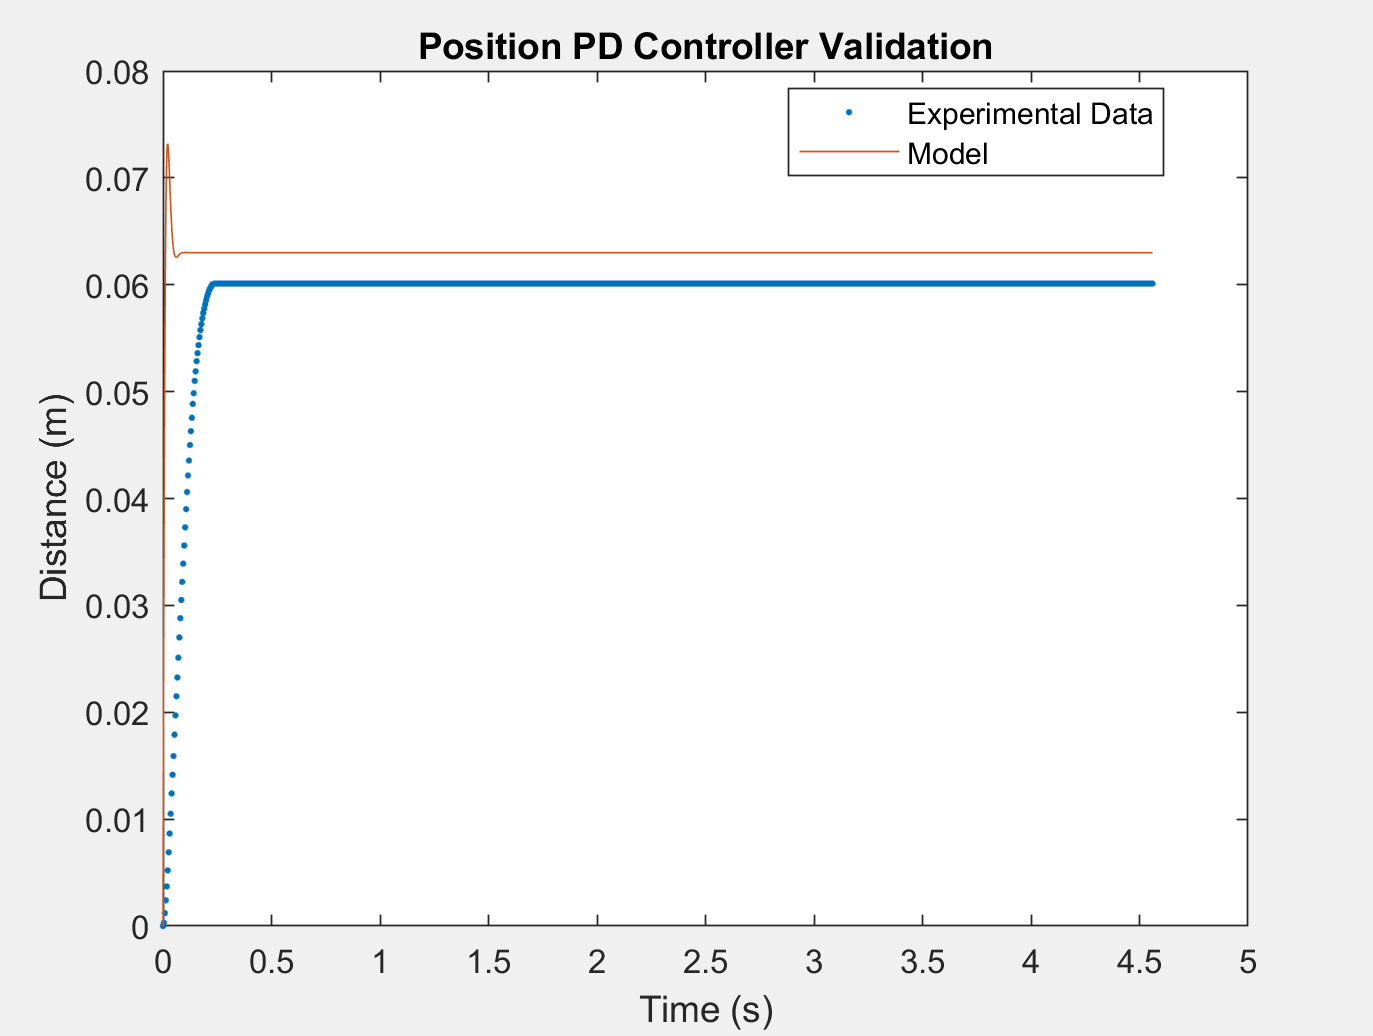

As can be seen, there are discrepancies between the model's and the experimental data's transient and steady state behavior. The small error in steady state behavior can be attributed to the Zumo's inability to overcome Coulomb friction with very small error. In this case, the error between the desired position and the Zumo's acual position is only 1/3 of a centimeter, which is incredibly small. For the transient behavior, the disparity can be attributed to the saturation of the controller on the first data point. Looking at the model, it appears that the actual position changes almost instantaneously, whereas, in the actual data, we see that it takes more time for the actual position to approach the desired position. This is corroborated by the initial voltage request significantly over 5.0V (the maximum able to be supplied by the Zumo's batteries), as the position error is changing instantly, and thus the derivative of the error would be infinite. This would correlate to requesting a very large voltage; however, the Zumo would only be able to physically provide an approximate maximum of 5.0V. This nonlinearity is not accounted for in the position controller model, and thus the transient behavior between the model and experimental data will differ.  

The yaw angle controller was independently validated by requesting a certain angle and collecting the Zumo's yaw angular position as it turned to achieve this desired angle. The desired angle was set to $15^\circ{}$, as this was the maximum angle that could be requested without encountering saturation. The following figure shows the collected yaw angular position data plotted against the model's prediction:

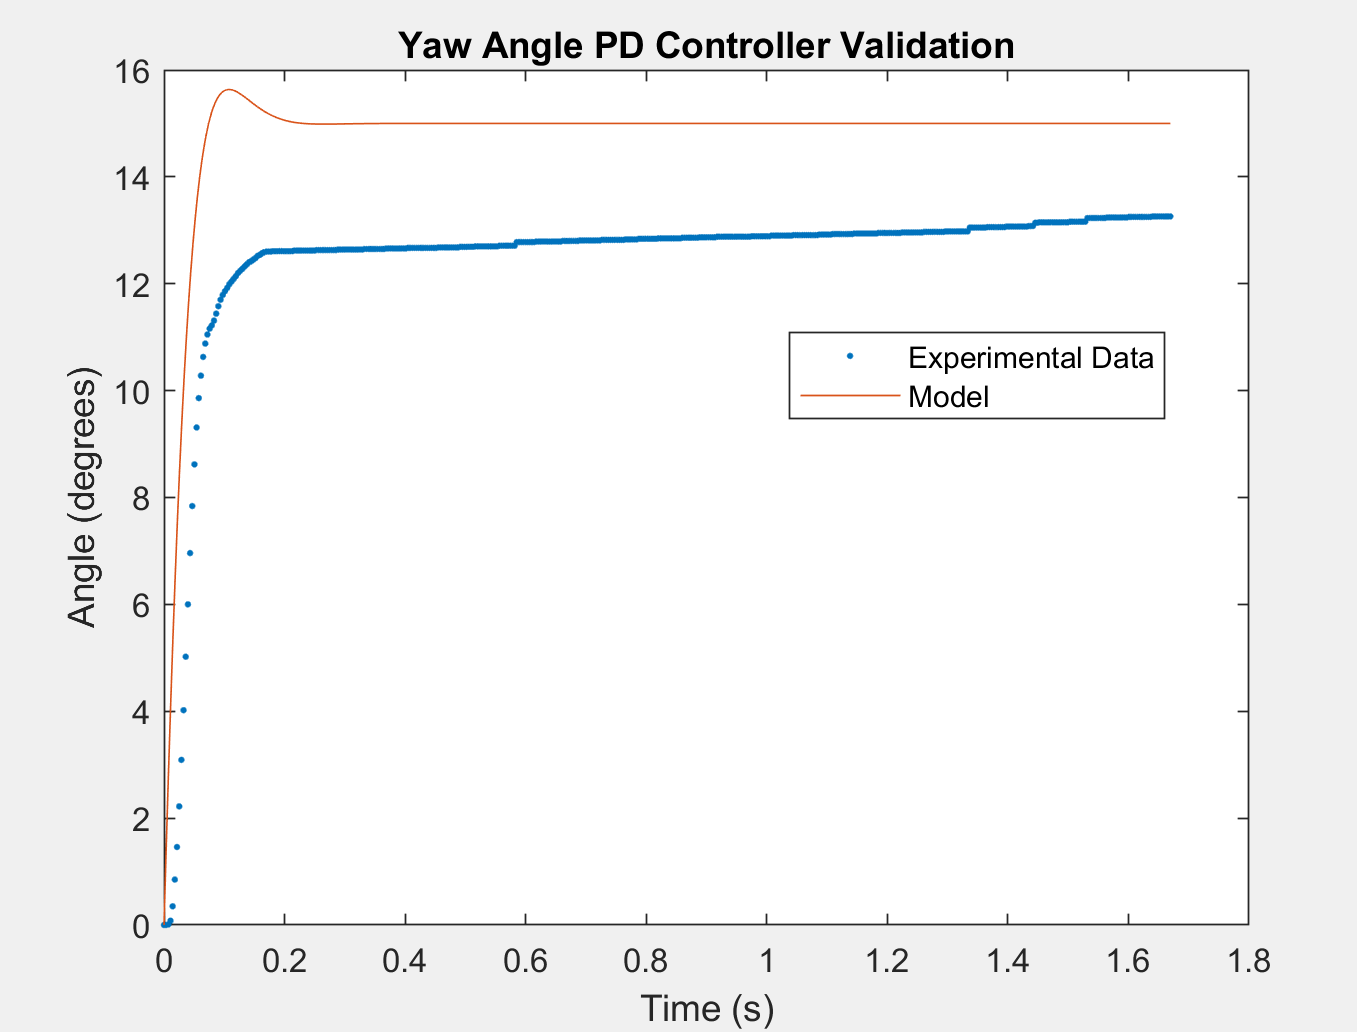

As can be seen in the above figure, there are slight discrepancies between the model prediction and the experimental data. The differences in transient behavior are most likely due to saturation of the controller. The yaw angular position error is changing instantly, and thus the derivative of the error would be infinite. This would correlate to requesting a large voltage, which the Zumo is unable to produce. The steady state differences are slightly more pronounced and can be attributed to the inability to overcome Coulomb friction as the error between desired and actual angular position becomes small. There is a steady state error of approximately $1.5^\circ{}$. With this small amount of error, the requested voltage would be approximately 0.5V. This is less than the minimum voltage needed to overcome Coulomb friction calculated to be 0.75V (refer to the position controller design section). Thus, at this small error, the requested voltage is not enough to overcome Coulomb friction, therefore accounting for this small amount of steady state error. Furthermore, the data is slightly sloped at the beginning of the test, which is due to Coulomb friction at the beginning of the test as the Zumo is initially starting from rest.  